# Table of Contents
 <p><div class="lev1 toc-item"><a href="#《Python-大战机器学习》阅读" data-toc-modified-id="《Python-大战机器学习》阅读-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>《Python 大战机器学习》阅读</a></div><div class="lev1 toc-item"><a href="#第一章-线性模型" data-toc-modified-id="第一章-线性模型-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>第一章 线性模型</a></div><div class="lev2 toc-item"><a href="#线性回归" data-toc-modified-id="线性回归-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>线性回归</a></div><div class="lev3 toc-item"><a href="#最小二乘" data-toc-modified-id="最小二乘-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>最小二乘</a></div><div class="lev3 toc-item"><a href="#带正则项的最小二乘" data-toc-modified-id="带正则项的最小二乘-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>带正则项的最小二乘</a></div><div class="lev3 toc-item"><a href="#单元线性回归" data-toc-modified-id="单元线性回归-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>单元线性回归</a></div><div class="lev4 toc-item"><a href="#一个简单的例子" data-toc-modified-id="一个简单的例子-2131"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>一个简单的例子</a></div><div class="lev4 toc-item"><a href="#LinearRegression类" data-toc-modified-id="LinearRegression类-2132"><span class="toc-item-num">2.1.3.2&nbsp;&nbsp;</span>LinearRegression类</a></div><div class="lev2 toc-item"><a href="#带正则项的多元线性回归" data-toc-modified-id="带正则项的多元线性回归-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>带正则项的多元线性回归</a></div><div class="lev3 toc-item"><a href="#岭回归" data-toc-modified-id="岭回归-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>岭回归</a></div><div class="lev3 toc-item"><a href="#Lasso回归" data-toc-modified-id="Lasso回归-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Lasso回归</a></div><div class="lev3 toc-item"><a href="#Elastic-net" data-toc-modified-id="Elastic-net-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Elastic net</a></div><div class="lev2 toc-item"><a href="#广义线性模型" data-toc-modified-id="广义线性模型-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>广义线性模型</a></div><div class="lev3 toc-item"><a href="#logistic模型" data-toc-modified-id="logistic模型-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>logistic模型</a></div><div class="lev3 toc-item"><a href="#L1-penalty-and-Sparsity-in-Logistics-regression" data-toc-modified-id="L1-penalty-and-Sparsity-in-Logistics-regression-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>L1 penalty and Sparsity in Logistics regression</a></div><div class="lev2 toc-item"><a href="#LDA线性判别分析" data-toc-modified-id="LDA线性判别分析-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LDA线性判别分析</a></div><div class="lev3 toc-item"><a href="#为什么是线性的分界线？" data-toc-modified-id="为什么是线性的分界线？-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>为什么是线性的分界线？</a></div><div class="lev3 toc-item"><a href="#核心思想" data-toc-modified-id="核心思想-242"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>核心思想</a></div><div class="lev3 toc-item"><a href="#推广到多维" data-toc-modified-id="推广到多维-243"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>推广到多维</a></div><div class="lev3 toc-item"><a href="#sklearn中的实现" data-toc-modified-id="sklearn中的实现-244"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>sklearn中的实现</a></div><div class="lev3 toc-item"><a href="#LDA进行降维" data-toc-modified-id="LDA进行降维-245"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>LDA进行降维</a></div><div class="lev3 toc-item"><a href="#shrinkage" data-toc-modified-id="shrinkage-246"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>shrinkage</a></div><div class="lev3 toc-item"><a href="#LDA函数中的优化方法" data-toc-modified-id="LDA函数中的优化方法-247"><span class="toc-item-num">2.4.7&nbsp;&nbsp;</span>LDA函数中的优化方法</a></div>

# 《Python 大战机器学习》阅读
# 第一章 线性模型

## 线性回归

### 最小二乘

对于线性回归问题，定义损失函数为平方函数时，产生的优化问题:
$$arg \underset{\beta}{min} \sum (Y-X\beta)^{T}(Y-X\beta)$$
可以考虑使用梯度下降法来求解；

作者提到，在做梯度下降前，需要进行**归一化(标准化)**:
+ 提升模型的收敛速度，避免因为量纲不同而产生之字形的下降路线
+ 减少量纲的影响

求矩阵微商，即最优解应当是:
$$\frac{\delta f}{\delta \beta} = 2X(X\beta - Y)=0，$$故
$$\hat{\beta}=(X^{T}X)^{-1}X^T y$$

### 带正则项的最小二乘
由于$X^TX$不一定是满秩矩阵，因此常考虑引入正则项，即L1正则化或者L2正则化：
$$arg \underset{\beta}{min} \sum (Y-X\beta)^{T}(Y-X\beta)+ \lambda ||\beta||_2^2$$

### 单元线性回归

#### 一个简单的例子

In [1]:
from sklearn import linear_model,datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# 此处使用一个糖尿病的数据
diabetes = datasets.load_diabetes()

diabetes这个数据是一个字典，包括数据和label部分：
+ 共有442个样本
+ 每个样本有10个特征

In [3]:
print len(diabetes['data']), len(diabetes['target'])

442 442


In [4]:
diabetes.data.shape

(442, 10)

In [5]:
# 单变量回归
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


In [6]:
# 新建一个linear model对象
regr = linear_model.LinearRegression()

# 将训练集代入进去
regr.fit(diabetes_X_train, diabetes_y_train)

/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print '系数是:\n', regr.coef_

系数是:
[ 938.23786125]


In [8]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

Mean squared error: 2548.07


In [9]:
# R方
print '方差解释 %.2f' % regr.score(diabetes_X_test, diabetes_y_test)

方差解释 0.47


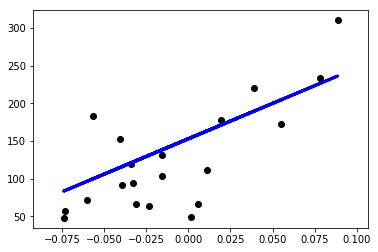

In [10]:


# 绘图
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test),color='blue',
        linewidth=3)


#### LinearRegression类
原型是:
class sklearn.linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_x=True,n_jobs=1)


**参数**:
+ fit_intercept:bool型，即是否需要截距
+ copy_x: 设置是否需要copy x
+ n_jobs:并行的CPU个数，-1表示使用所有CPU
+ normalize: 若设置为True，则在建模之前会先标准化

**属性**：
+ coef:权重向量
+ intercept： b值

**方法**:
+ fit(X,y[,sample_weight]): 训练模型
+ predict：预测
+ score(x,y[,sample_weight]):测试集的R2

下面使用糖尿病的数据来建立单变量线性回归

In [11]:
from sklearn import cross_validation
# 定义读取和切分训练集以及测试集的函数
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target,
                                            test_size=0.25, random_state=0)
    

/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# 建模的函数
def test_LinearRegression(*data):
    X_train, X_test,y_train,y_test = data
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print '系数是 %s, 截距是 %.2f' % (regr.coef_, regr.intercept_)
    print '残差平方和是 %.2f' % np.mean((regr.predict(X_test)-y_test) ** 2)
    print 'R方是: %.2f' % regr.score(X_test, y_test)

In [13]:
X_train, X_test, y_train, y_test = load_data()
test_LinearRegression(X_train, X_test, y_train, y_test)

系数是 [ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], 截距是 153.07
残差平方和是 3180.20
R方是: 0.36


In [14]:
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

## 带正则项的多元线性回归
添加正则项，其实可以理解为一个带约束的优化问题，而带约束即可以理解为为beta引入了先验分布，控制了模型空间。

+ 岭回归：2范数
+ lasso：1范数
+ Elastic net： 二者的加权

### 岭回归
$$L(w) = (Y-Xw)^T(Y-Xw)+\alpha ||w||_2^2$$

class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=False,copy_x=True, max_iter=None,tol=0.001,solver='auto',random_state=None)

**参数**:
+ alpha: 超参数
+ max_iter:最大迭代次数
+ solver：求解这个最优化问题的时候的算法
  + auto：根据数据集自动选择
  + svd：奇异值分解
  + cholesky: scipy.linalg.solve
  + sparse_cg: scipy.sparse.linalg.cg Use Conjugate Gradient iteration to solve ``Ax = b``.

  + lsqr:scipy.sparse.linalg.lsqr;运算速度最快
  + sag:使用stochastic average gradient descent算法
  
+ tol：判断是否收敛的阈值
+ random_state:随机数生成器的种子

**属性**：
+ coef_: 权重向量
+ intercept_:b
+ n_iter:实际迭代次数

**方法**:
+ fit,predict,score

In [15]:
reg_ridge = linear_model.Ridge(solver='sag')
reg_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [16]:
reg_ridge.score(X_test,y_test)

0.356923270250743

In [17]:
# 看看不同alpha下R方的变化趋势
n_alpha = 200
alphas = np.logspace(-10,2,n_alpha)

In [18]:
model_ridge = linear_model.Ridge()
coefs, scores=[],[]

In [19]:
for alpha in alphas:
    model_ridge.set_params(alpha=alpha)
    model_ridge.fit(X_train,y_train)
    coefs.append(model_ridge.coef_)
    scores.append(model_ridge.score(X_test,y_test))

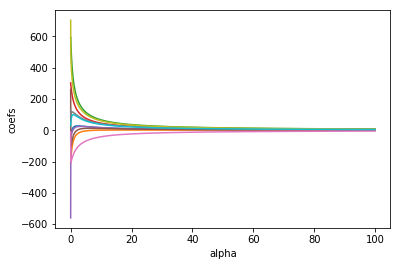

In [20]:
plt.plot(alphas,coefs)
plt.xlabel('alpha')
plt.ylabel('coefs')

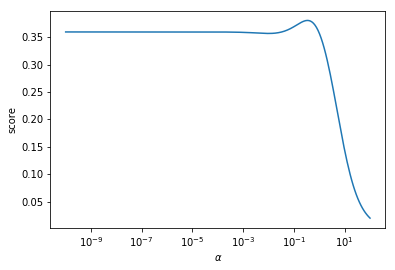

In [21]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(alphas, scores)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'score')
ax.set_xscale('log')

### Lasso回归
Lasso回归是一范数,可以将系数压缩到0
相比于岭回归，多了参数：
+ precompute: 是否提前计算Gram矩阵来加速计算
+ positive: 是否强制要求系数都为正数
+ selection:cyclic或者random，每轮迭代的时候，选择权重向量的哪一个来更新，random是随机选择一个分量来更新，而cyclic是从前向后依次选择
+ warm_start:是否选择前一次的训练结果继续训练


/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


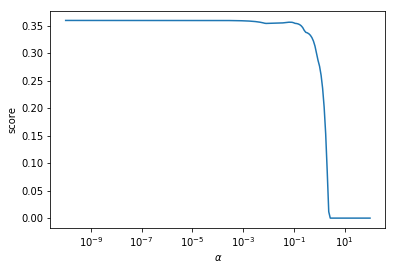

In [22]:
model_lasso = linear_model.Lasso()
coefs, scores=[],[]
for alpha in alphas:
    model_lasso.set_params(alpha=alpha)
    model_lasso.fit(X_train,y_train)
    coefs.append(model_lasso.coef_)
    scores.append(model_lasso.score(X_test,y_test))

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(alphas, scores)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'score')
ax.set_xscale('log')

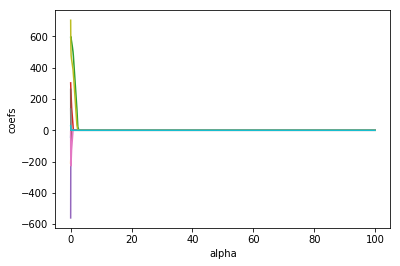

In [23]:
plt.plot(alphas,coefs)
plt.xlabel('alpha')
plt.ylabel('coefs')

### Elastic net
$$\alpha \rho ||w||_1 + \frac{\alpha (1-\rho)}{2}||W||_2^2$$

**参数**:
+ alpha: $\alpha值$
+ l1_ratio: $\rho 值$

In [25]:
regr_elastic = linear_model.ElasticNet()
regr_elastic.fit(X_train, y_train)

regr_elastic.coef_

array([ 0.40560736,  0.        ,  3.76542456,  2.38531508,  0.58677945,
        0.22891647, -2.15858149,  2.33867566,  3.49846121,  1.98299707])

In [26]:
# 残差平方和
np.mean((regr_elastic.predict(X_test)-y_test)**2)

4922.3550757217681

In [64]:
# 查看不同的超参数对模型的影响
alphas = np.logspace(-2,2)
rhos=np.linspace(0.01,1)
scores=[]
for alpha in alphas:
    for rho in rhos:
        regr = linear_model.ElasticNet(alpha=alpha,l1_ratio=rho)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))


In [36]:
from mpl_toolkits.mplot3d import Axes3D

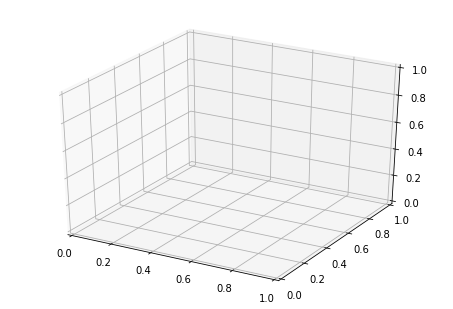

In [65]:
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax

In [66]:
alphas, rhos = np.meshgrid(alphas, rhos)
scores=np.array(scores).reshape(alphas.shape)
surf = ax.plot_surface(alphas, rhos, scores, rstride=1,cstride=1,cmap=cm.jet,linewidth=0,antialiased=False)

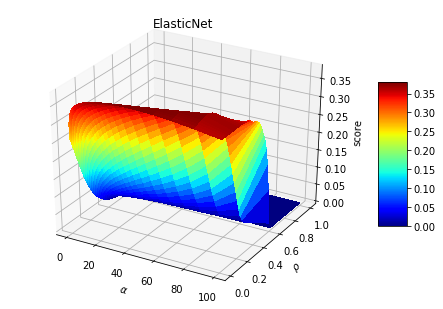

In [67]:
fig.colorbar(surf,shrink=0.5,aspect=5)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\rho$')
ax.set_zlabel('score')
ax.set_title('ElasticNet')
fig

In [63]:
scores

array([[ 0.008472,  0.008472,  0.008472, ...,  0.008472,  0.008472,
         0.008472],
       [ 0.008472,  0.008472,  0.008472, ...,  0.008472,  0.008472,
         0.008472],
       [ 0.008472,  0.008472,  0.008472, ...,  0.008472,  0.008472,
         0.008472],
       ..., 
       [ 0.008472,  0.008472,  0.008472, ...,  0.008472,  0.008472,
         0.008472],
       [ 0.008472,  0.008472,  0.008472, ...,  0.008472,  0.008472,
         0.008472],
       [ 0.008472,  0.008472,  0.008472, ...,  0.008472,  0.008472,
         0.008472]])

## 广义线性模型
广义线性模型的定义是 存在一个单调可微函数 h(),
$h(y)=X\beta+\epsilon$称为是一个广义线性模型(GLM).

### logistic模型
通过$Y=X^T\beta$来拟合条件概率$P(y=1|X)$，

本来是需要考虑h为一个阶跃函数，当$z=X^T\beta < 0 $，则令y=0，否则令y=1；可是由于阶跃函数是不可微的，因此考虑使用比值比:

$$P(Y=1|X)=\frac{1}{1+e^{-X^T\beta}}=1-P(Y=0|X)$$

因此，有
$$ln \frac{\pi}{1-\pi}=z=X^T\beta$$

似然函数为
$$L=\prod_i \pi_i^{y_i}{(1-\pi_i)}^{1-y_i}$$

对数似然函数为:
$$ln L = \sum_i [y_iln(\pi_i) + (1-y_i)ln(1-\pi_i)] \\ = \sum_i [y_iln(\frac{\pi_i}{1-\pi_i}) + ln(1-\pi_i)] \\ = \sum_i [y_i\beta^T X^{(i)}-ln(1+exp(\beta^T X^{(i)}))]$$

求极大值(梯度下降法) :
$$\mbox{每一步更新的过程}：\beta_{n+1} = \beta_n - \eta \frac{\delta L}{\delta\beta}$$


**损失函数**
logistic的损失函数为对数损失函数(对数似然损失函数)，即$$L(Y,P(Y|X))=-logP(Y|X)$$,即同样可以推出，等价于对数似然函数
$$-ylog\pi-(1-y)log(1-\pi)$$,最小化，等价于上面的似然函数最大化

+ 首先考虑用普通形式来求导，表示一下梯度下降法的过程
上面的式子中

$$ln L =  \sum_i [y_i\beta^T X^{(i)}-ln(1+exp(\beta^T X^{(i)}))],\ 若要关于某一个\beta_j求微分，即有\\ \frac{\delta L}{\delta \beta_j}=\sum_i[y_ix_j^{(i)} - \frac{x_j^{(i)} exp(X^T\beta)}{1+exp(X^T\beta)}]=x_j^{(i)}\sum_i[y_i - P(Y=1|X)]$$

其实，如果用矩阵微商的方式来求解，则这次的微商其实是上面这个结果构成的列向量(直接用矩阵的微商定义，也可以得到，即每一个位置关于相应参数求微分):
$$\frac{\delta L}{\delta \beta}=x^{(i)}\sum_i[y_i - P(Y=1|X)]$$

+ 对于类别不平衡问题，可以考虑在类对象中定义class_weight ='auto',由于y可以理解为概率
$$\frac{y}{1-y}>1$$时，判为正例,但由于类别不平衡，考虑$$\frac{y}{1-y}>\frac{m^+}{m^-}$$，可以理解为一个scaling的过程


+ 对于多分类的模型，可以考虑softmax

In [1]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


+ linear_model.LogisticRegression
表示的是逻辑斯蒂回归模型的对象

**参数**:
+ penalty: 'l2'表示是2范数惩罚；‘l1'表示是1范数惩罚。
+ solver:
'newton-cg':牛顿法
’lbfgs‘: l-bfgs拟牛顿法
'liblinear':liblinear（coordinate descent）
’sag‘: stocastic average gradient descent

**规模小的数据集，'liblinear'比较适用;规模大的话，'sag'比较适合;newton,lbfgs,sag只处理惩罚项为l2的情况**

+ multi_class:用于多分类问题
若'ovr'，使用one-vs-rest策略

若'multinomial',使用softmax策略

**属性**:coef_,intercept_,n_iter_
**方法**:
fit,predict,

predict_log_proba():对应各类的对数概率值

predict__proba():对应各类的概率值

score

In [2]:
from sklearn import datasets, cross_validation
def load_data():
    iris=datasets.load_iris()
    X_train = iris.data
    y_train = iris.target
    return cross_validation.train_test_split(X_train, y_train, test_size=0.25,random_state=0,stratify=y_train)

/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# 使用分层抽样（stratify那里指定的是使用分层抽样）
def test_LogisticRegression(*data):
    X_train,X_test,y_train,y_test = data
    regr = linear_model.LogisticRegression()
    regr.fit(X_train, y_train)
    print 'coefficients is %s, intercept %s' % (regr.coef_, regr.intercept_)
    print 'score is %.2f' % regr.score(X_test, y_test)

In [4]:
X_train,X_test,y_train,y_test = load_data()
test_LogisticRegression(X_train, X_test, y_train, y_test)

coefficients is [[ 0.39310895  1.35470406 -2.12308303 -0.96477916]
 [ 0.22462128 -1.34888898  0.60067997 -1.24122398]
 [-1.50918214 -1.29436177  2.14150484  2.2961458 ]], intercept [ 0.24122458  1.13775782 -1.09418724]
score is 0.97


考虑使用multiclass，需要注意只有牛顿法或者拟牛顿法才可以考虑使用multiclass='multinomial’

In [5]:
# 多类别分类
def test_LogisticRegression_multi(*data):
    X_train,X_test,y_train,y_test = data
    regr = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial')
    regr.fit(X_train, y_train)
    print 'coefficients is %s, intercept %s' % (regr.coef_, regr.intercept_)
    print 'score is %.2f' % regr.score(X_test, y_test)

In [6]:
X_train,X_test,y_train,y_test = load_data()
test_LogisticRegression_multi(X_train, X_test, y_train, y_test)

coefficients is [[-0.38365952  0.85431014 -2.27253566 -0.98521824]
 [ 0.34380025 -0.37353943 -0.03061608 -0.86062619]
 [ 0.03985927 -0.48077072  2.30315175  1.84584443]], intercept [  8.80306212   2.46693936 -11.27000149]
score is 1.00


In [7]:
# 最后想要看C这个压缩系数对分类效果的影响
Cs=np.logspace(-2,4,num=100)
scores=[]
for C in Cs:
    regr = linear_model.LogisticRegression(C=C,solver='lbfgs', multi_class='multinomial')
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
        


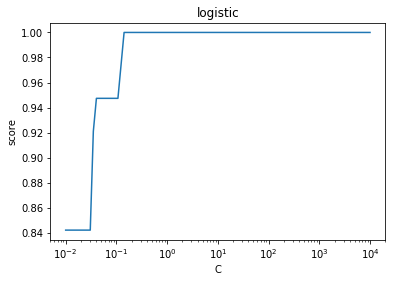

In [8]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(Cs,scores)
ax.set_xlabel(r'C')
ax.set_ylabel(r'score')
ax.set_xscale('log')
ax.set_title('logistic')
plt.show()

### L1 penalty and Sparsity in Logistics regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

In [11]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [13]:
X, y = digits.data, digits.target
X

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [16]:
#StandardScaler 0,1标准化
X= StandardScaler().fit_transform(X)


In [19]:
y = (y>4).astype(np.int)
y

array([0, 0, 0, ..., 1, 1, 1])

C=100.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9115
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 10.94%
score with L1 penalty: 0.9093
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8614
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


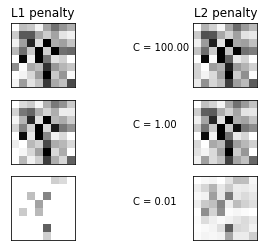

In [22]:
# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

## LDA线性判别分析

### 为什么是线性的分界线？
在比较任意两个类k与l时，事实上是比较二者的后验概率;即
$$log\frac{Pr(G=k|X=x))}{Pr(G=l|X=x)}=log\frac{f_k}{f_l}+log\frac{\pi_k}{\pi_l}\\=
log\frac{\pi_k}{\pi_l}-\frac{1}{2}(\mu_k+\mu_l)^T \Sigma^{-1}(\mu_k-\mu_l)+x^T\Sigma^{-1}(\mu_k-\mu_l)
此处假设每一个类别都满足多元正态分布，且协方差阵相同$$;

可以看出当两者概率相等，是一个x线性的式子，即一个直线(超平面).
由此得到的线性判别函数
$$\sigma_k(x)=x^T\Sigma_{-1}\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+log\pi_K$$

紧接着的判别过程，就变为了$argmax \sigma_k$的过程。

+ 当协方差阵不同时，就会转变为QDA。


+ 与logistics模型的区别
由于logistic模型是建立在条件似然函数下的，所以不用考虑x的概率分布部分，Efron证明这会造成30%的信息缺失。因此相比较于LDA，logistic最后多30%的数据。
 + LDA对于outlier不robust。logistic更加安全，LDA的假设过多

### 核心思想
考虑将样本投影到一条直线上，同类的投影点竟可能地近，异类的投影点尽可能地远。
$若这条直线是W, 两类的均值，协方差分别为\mu_0,\mu_1, \Sigma_0,\Sigma_1$

构造评价指标为(尽可能大) :
$$J=\frac{||W^T\mu_0-W^T\mu_1||_2^2}{W^T\Sigma_0W+W^T\Sigma_1W}\\=\frac{W^T(\mu_0-\mu_1)(\mu_0-\mu_1)^TW}{W^T(\Sigma_0+\Sigma_1)W}\\
=\frac{W^TS_bW}{W^TS_wW}$$

即希望类间距离尽可能地大，类内协方差尽可能小

以上的最大化可以使用拉格朗日乘数定理(由于若W是一个解，则kW也是一个解，不妨设$W^TS_wW=1$)

$$
\underset{w}{min} - w^TS_bw \\ s.t. w^TS_ww=1
\\即，S_bw=\lambda S_ww$$

由于$$S_bw=(\mu_0-\mu_1)^Tw(\mu_0-\mu_1)=k(\mu_0-\mu_1)\\始终在(\mu_0-\mu_1)方向上,因此可有 w=S_w^{-1}(\mu_0-\mu_1)$$

实践中，常常对$S_w^{-1}$进行奇异值分解；

+ 可以证明，两类数据同样先验，满足高斯分布并且协方差相等时，LDA可达到最优分类。

### 推广到多维
全局离散矩阵 $S_t=S_b+S_w=\sum_i^m(x_i-\mu_i)(x_i-\mu_i)^T$，其中

$S_w=\sum_i^NS_{wi}$ 常用的一种优化目标是:


$$\underset{W}{max}\frac{tr(W^TS_bW)}{tr(W^TS_wW)}$$


这个问题求解可以用广义特征值问题来求解：

$$S_bW=\lambda S_wW$$

### sklearn中的实现
sklearn.discriminant_analysis.LinearDiscriminantAnalysis
**参数**:
+ solver: 求解最优化的算法；'svd','lsqr':最小平方差,'eigen'：特征值分解
+ shrinkage:
+ priors:指定每一个类别的先验概率
+ n_components:数据降维后的维度
+ store_covariance:是否需要额外计算每个类别的协方差矩阵
+ tol:迭代收敛的阈值

**属性**:
+ coef_, intercept_, covariance, means_,
+ xbar_: 整体样本的均值向量
+ n_iter_:实际迭代次数

**方法**：
+ fit,predict,predict_log_proba,predict_proba,score

In [2]:
import sklearn
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [3]:
# 读取数据
from sklearn import datasets, cross_validation
def load_data():
    iris=datasets.load_iris()
    X_train = iris.data
    y_train = iris.target
    return cross_validation.train_test_split(X_train, y_train, test_size=0.25,random_state=0,stratify=y_train)



/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
def test_LDA(*data):
    X_train, X_test, y_train, y_test = data
    lda = LinearDiscriminantAnalysis() # 调用类构造函数
    lda.fit(X_train, y_train)
    print 'coefficients: %s \n, intercept: %s' % (lda.coef_, lda.intercept_)
    print 'Score: %.2f' % lda.score(X_test, y_test)

In [7]:
# 读入数据，并训练模型
X_train, X_test, y_train, y_test = load_data()
test_LDA(X_train, X_test, y_train, y_test)

coefficients: [[  6.575853     9.75807593 -14.34026669 -21.39076537]
 [ -1.98385061  -3.49791089   4.21495042   2.60304299]
 [ -4.47116022  -6.09542385   9.85886057  18.29330864]] 
, intercept: [-15.33097142   0.46730077 -30.53297367]
Score: 1.00


结果为1，说明LDA对测试集的预测结果是完全准确的，下面从图上来得到更加直观的理解。
给出绘制LDA降维后的数据集的函数

In [11]:
def plot_LDA(converted_X, y):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = Axes3D(fig)
    colors='rgb'
    markers='o*s'
    for target,color,marker in zip([0,1,2], colors, markers):
        pos=(y==target).ravel()
        X=converted_X[pos,:]
        ax.scatter(X[:,0],X[:,1],X[:,2],color=color,marker=marker,label='Label %d'%target)
    
    ax.legend(loc='best')
    fig.suptitle('Iris After LDA')
    plt.show()

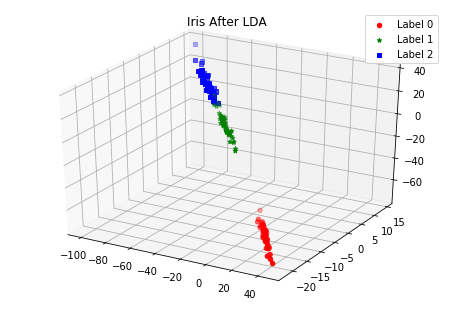

In [12]:
X=np.vstack((X_train,X_test))
Y=np.vstack((y_train.reshape(y_train.size, 1), y_test.reshape(y_test.size, 1)))
lda=LinearDiscriminantAnalysis()
lda.fit(X,Y)
converted_X = np.dot(X, np.transpose(lda.coef_)) + lda.intercept_
plot_LDA(converted_X,Y)

比较不同solver对预测性能的影响

In [13]:
def test_multisolver(*data):
    X_train, X_test, y_train, y_test = data
    solvers = ['svd', 'lsqr', 'eigen']
    for solver in solvers:
        if(solver == 'svd'):
            lda = LinearDiscriminantAnalysis(solver=solver)
        else:
            lda = LinearDiscriminantAnalysis(solver=solver, shrinkage=None)
        
        lda.fit(X_train, y_train)
        print 'score at solver = %s: %.2f' % (solver, lda.score(X_test, y_test))

In [14]:
test_multisolver(X_train, X_test, y_train, y_test)

score at solver = svd: 1.00
score at solver = lsqr: 1.00
score at solver = eigen: 1.00


/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


最后考察在solver=lsqr中引入抖动，引入抖动相当于引入了正则化项。

In [23]:
def test_LDA_shrinkage(*data):
    X_train, X_test, y_train, y_test = data
    shrinkages = np.linspace(0.0, 1.0, num=20)
    scores=[]
    for shr in shrinkages:
        lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shr)
        lda.fit(X_train, y_train)
        scores.append(lda.score(X_test, y_test))
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(shrinkages, scores)
    ax.set_xlabel(r'shrinkage')
    ax.set_ylabel(r'score')
    ax.set_ylim(0,1,0.05)
    ax.set_title('LDA')
    plt.show()

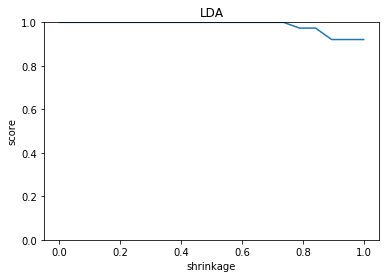

In [24]:
test_LDA_shrinkage(X_train, X_test, y_train, y_test)

可以看到，随着shrinkage的增大，模型的预测准确率会随之下降。

### LDA进行降维
LDA相比较于pCA，是一个监督学习方法；

    PCA projects the entire dataset onto a different feature (sub)space, and LDA tries to determine a suitable feature (sub)space in order to distinguish between patterns that belong to different classes.
    
即PCA是非监督方法，将整个数据集投影到一个新的特征空间内；而LDA为了寻找一个合适的特征子空间，去分辨label。

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2) # 保留两个主成分

In [8]:
X_r = pca.fit(X).transform(X)
lda = LDA(n_components=2) # 降维到2维
X_r2 = lda.fit(X, y).transform(X)

# 方差解释率
print '方差解释率有: %s' % str(pca.explained_variance_ratio_)

方差解释率有: [ 0.92461621  0.05301557]


In [9]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors,[0,1,2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y==i,1], color=color, alpha=0.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS datasets')

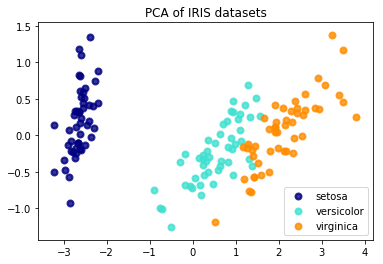

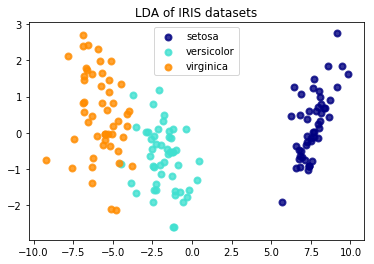

In [10]:
plt.figure()
for color, i, target_name in zip(colors,[0,1,2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y==i,1], color=color, alpha=0.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS datasets')
plt.show()

### shrinkage
当n小于p时，样本方差阵不是一个好的估计。
ledoit and wolf 提出了一种sheinkage的方法，只有在solver为‘lsqr'和'eigen‘的时候才有用。

0表示使用原先的经验矩阵，1表示使用对角矩阵

### LDA函数中的优化方法
+ 默认的是svd，但是svd不能与shrikage一起使用。它不需要计算协方差阵，因此可以用于高维。

+ 'lsqr':仅仅适用于分类
+ 'eigen':需要计算协方差阵，所以可能不适合高维；分类和transoform都可以